#0.Environment preparation

In [ ]:
!wget https://github.com/ignaciomartinez12/machine_learning/raw/main/products.csv

--2023-01-23 17:09:14--  https://github.com/ignaciomartinez12/machine_learning/raw/main/products.csv
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ignaciomartinez12/machine_learning/main/products.csv [following]
--2023-01-23 17:09:14--  https://raw.githubusercontent.com/ignaciomartinez12/machine_learning/main/products.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41007317 (39M) [text/plain]
Saving to: ‘products.csv.4’

products.csv.4      100%[===================>]  39.11M  --.-KB/s    in 0.1s    

2023-01-23 17:09:16 (329 MB/s) - ‘products.csv.4’ saved [41007317/41007317]



In [ ]:
!pip install contractions
!pip install textblob
import nltk
nltk.download("all")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

#1.Preprocessing

In [ ]:
content = []
with open("products.csv") as f:
    content = f.read().split("\n", maxsplit=50823)

In [ ]:
import pandas as pd
content.pop(0)
content.pop(50822)
def splitBien(cadena):
  cadena_buena = []
  value = ""
  inside = False
  cont = 0
  while cont < len(cadena) - 1:
    if cadena[cont] == ',' and not inside and cadena[cont+1] == '"' and len(cadena_buena) != 9:
      cadena_buena.append(value)
      value = ""
      inside = True
    elif cadena[cont] == ',' and not inside and len(cadena_buena) != 9:
      cadena_buena.append(value)
      value = ""
    elif cadena[cont] == ',' and cadena[cont-1] == '"' and len(cadena_buena) != 9:
      cadena_buena.append(value)
      value = ""
      inside = False
    elif cont == len(cadena) -2: 
      value = value + cadena[cont] + cadena[cont+1]
      cadena_buena.append(value)
    else:
      if cadena[cont] != '"': value+=cadena[cont]
    cont += 1
  return cadena_buena

cont = 0
new_content = []
for i in content:
  new = splitBien(i)
  new_content.append(new)

df = pd.DataFrame(new_content, columns = ['Id','ProductId','UserId','ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Score','Time','Summary','Text'])
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,Natalia Corres Natalia Corres,1,1,4,1219017600,Delight says it all,This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,Michael D. Bigham M. Wassir,0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


##1.1 Remove useless characters

Fisrt of all, we are going to remove the punctuation marks and the useless characters.

We have considered all the English punctuation marks. So, in order to remove them, an algorithm has been developed and you can find it in the below section.

In [ ]:
characters = ['!','"','_','$','%','&','/','(',')','=','_','ˆ','*','¡','@']

In [ ]:
from pandas._libs.tslibs.parsing import format_is_iso
import string
from nltk.tokenize import word_tokenize

def removeCharacters(originalString, characters):
  i = 0
  newString = ""
  while i < len(characters):
    if i == 0:
      newString = originalString.replace(characters[i], "")
    else:
      newString = newString.replace(characters[i], "")
    i+=1
  return newString

i = 0
for sentence in df["Text"]:
  tokenized = word_tokenize(removeCharacters(str(sentence), characters))
  
  j = 0
  for word in tokenized:
    if word in string.punctuation:
      tokenized.pop(j)
    j+=1

  df["Text"][i] = tokenized
  i+=1

i = 0
for sentence in df["Summary"]:
  tokenized = word_tokenize(removeCharacters(str(sentence), characters))
  
  j = 0
  for word in tokenized:
    if word in string.punctuation:
      tokenized.pop(j)
    j+=1

  df["Summary"][i] = tokenized
  i+=1

In [ ]:
df[["Summary", "Text"]]

,Summary,Text
0,"[Good, Quality, Dog, Food]","[I, have, bought, several, of, the, Vitality, ..."
1,"[Not, as, Advertised]","[Product, arrived, labeled, as, Jumbo, Salted,..."
2,"[Delight, says, it, all]","[This, is, a, confection, that, has, been, aro..."
3,"[Cough, Medicine]","[If, you, are, looking, for, the, secret, ingr..."
4,"[Great, taffy]","[Great, taffy, at, a, great, price, There, was..."
...,...,...
50817,"[LOVE, LOVE, LOVE, this, food]","[My, Persian, loves, this, food, and, it, 's, ..."
50818,"[Cats, love, it]","[My, persian, Gavin, plus, the, non-Persian, E..."
50819,"[fruit, snacks]","[I, used, to, get, these, with, my, lunch, at,..."
50820,"[..., sweet, dreams, ...]","[..., indeed, this, syrup, has, a, wonderful, ..."


##1.2 Remove all capital letters

Once we have deleted all the punctuation marks we can proceed by removing all the capital letters that exists in the data of the data-set. As we are using Python3 we can easily turn all the text from capital letter to lower case by using a simple function.

So, in order to remove them from all the reviews, an algorithm has been developed and you can find it in the below section.

In [ ]:
i = 0
for sentence in df['Text']:
   j = 0
   for word in sentence:
     sentence[j] = word.lower()
     j+=1
   df['Text'][i] = sentence
   i+=1

i = 0
for sentence in df['Summary']:
   j = 0
   for word in sentence:
     sentence[j] = word.lower()
     j+=1
   df['Summary'][i] = sentence
   i+=1

In [ ]:
df[["Summary", "Text"]]

,Summary,Text
0,"[good, quality, dog, food]","[i, have, bought, several, of, the, vitality, ..."
1,"[not, as, advertised]","[product, arrived, labeled, as, jumbo, salted,..."
2,"[delight, says, it, all]","[this, is, a, confection, that, has, been, aro..."
3,"[cough, medicine]","[if, you, are, looking, for, the, secret, ingr..."
4,"[great, taffy]","[great, taffy, at, a, great, price, there, was..."
...,...,...
50817,"[love, love, love, this, food]","[my, persian, loves, this, food, and, it, 's, ..."
50818,"[cats, love, it]","[my, persian, gavin, plus, the, non-persian, e..."
50819,"[fruit, snacks]","[i, used, to, get, these, with, my, lunch, at,..."
50820,"[..., sweet, dreams, ...]","[..., indeed, this, syrup, has, a, wonderful, ..."


## 1.3. Lemmatizing all terms

As we have successfully removed all the punctuation marks and capital letter we can now lemmatize all the words that are part of the different sentences that we have into the data-set.

Lemmatisation is the algorithmic process of determining the lemma of a word based on its intended meaning. So, we have to do this because we do not have any profit by using the conjugated words so by removing them we simplify the data.

In order to remove them from all the reviews, an algorithm has been developed and you can find it in the below section.

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

i=0
for sentence in df['Text']:
  df['Text'][i] = [lemmatizer.lemmatize(word, pos = 'v') for word in sentence]
  i+=1

i=0
for sentence in df['Summary']:
  df['Summary'][i] = [lemmatizer.lemmatize(word, pos = 'v') for word in sentence]
  i+=1



In [ ]:
df[["Summary", "Text"]]

,Summary,Text
0,"[good, quality, dog, food]","[i, have, buy, several, of, the, vitality, can..."
1,"[not, as, advertise]","[product, arrive, label, as, jumbo, salt, pean..."
2,"[delight, say, it, all]","[this, be, a, confection, that, have, be, arou..."
3,"[cough, medicine]","[if, you, be, look, for, the, secret, ingredie..."
4,"[great, taffy]","[great, taffy, at, a, great, price, there, be,..."
...,...,...
50817,"[love, love, love, this, food]","[my, persian, love, this, food, and, it, 's, n..."
50818,"[cat, love, it]","[my, persian, gavin, plus, the, non-persian, e..."
50819,"[fruit, snack]","[i, use, to, get, these, with, my, lunch, at, ..."
50820,"[..., sweet, dream, ...]","[..., indeed, this, syrup, have, a, wonderful,..."


#2 Vectorization

##2.1 Prepare dataframe

In [ ]:
for i in range(0, len(df['Text'])):
  df['Text'][i] = ' '.join(df['Text'][i])

df['Text']

0        i have buy several of the vitality can dog foo...
1        product arrive label as jumbo salt peanuts ......
2        this be a confection that have be around a few...
3        if you be look for the secret ingredient in ro...
4        great taffy at a great price there be a wide a...
                               ...                        
50817    my persian love this food and it 's not all ov...
50818    my persian gavin plus the non-persian ellie bo...
50819    i use to get these with my lunch at school eve...
50820    ... indeed this syrup have a wonderful smooth ...
50821    we have be buy velveeta shell cheese in the or...
Name: Text, Length: 50822, dtype: object

##2.2 TFIDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf = TfidfVectorizer(use_idf=True, smooth_idf=True)

#fit and transform
data_tfidf = vectorizer_tfidf.fit_transform(df['Text'].loc[:2500])

#create the dataframe to display the output
import pandas 
print(pandas.DataFrame(data_tfidf.toarray(), columns=vectorizer_tfidf.get_feature_names()) )

       00  000  000kwh   03  03510  042608460503  0472066978  0738551856   09  \
0     0.0  0.0     0.0  0.0    0.0           0.0         0.0         0.0  0.0   
1     0.0  0.0     0.0  0.0    0.0           0.0         0.0         0.0  0.0   
2     0.0  0.0     0.0  0.0    0.0           0.0         0.0         0.0  0.0   
3     0.0  0.0     0.0  0.0    0.0           0.0         0.0         0.0  0.0   
4     0.0  0.0     0.0  0.0    0.0           0.0         0.0         0.0  0.0   
...   ...  ...     ...  ...    ...           ...         ...         ...  ...   
2496  0.0  0.0     0.0  0.0    0.0           0.0         0.0         0.0  0.0   
2497  0.0  0.0     0.0  0.0    0.0           0.0         0.0         0.0  0.0   
2498  0.0  0.0     0.0  0.0    0.0           0.0         0.0         0.0  0.0   
2499  0.0  0.0     0.0  0.0    0.0           0.0         0.0         0.0  0.0   
2500  0.0  0.0     0.0  0.0    0.0           0.0         0.0         0.0  0.0   

       0g  ...  zip  ziploc

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## 2.3. TFIDF + N-grams

In [ ]:
#n-gramas:  ngram_range=(min,max)
vectorizer_tfidf_ngrams = TfidfVectorizer(ngram_range=(1,3))
data_tfidf_ngrams = vectorizer_tfidf_ngrams.fit_transform(df['Text'].loc[:2500])

print(pandas.DataFrame(data_tfidf_ngrams.toarray(),columns=vectorizer_tfidf_ngrams.get_feature_names()))

       00  00 49  00 49 ship  00 and  00 and each  00 bag  00 bag use  00 box  \
0     0.0    0.0         0.0     0.0          0.0     0.0         0.0     0.0   
1     0.0    0.0         0.0     0.0          0.0     0.0         0.0     0.0   
2     0.0    0.0         0.0     0.0          0.0     0.0         0.0     0.0   
3     0.0    0.0         0.0     0.0          0.0     0.0         0.0     0.0   
4     0.0    0.0         0.0     0.0          0.0     0.0         0.0     0.0   
...   ...    ...         ...     ...          ...     ...         ...     ...   
2496  0.0    0.0         0.0     0.0          0.0     0.0         0.0     0.0   
2497  0.0    0.0         0.0     0.0          0.0     0.0         0.0     0.0   
2498  0.0    0.0         0.0     0.0          0.0     0.0         0.0     0.0   
2499  0.0    0.0         0.0     0.0          0.0     0.0         0.0     0.0   
2500  0.0    0.0         0.0     0.0          0.0     0.0         0.0     0.0   

      00 box the  00 car  .

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## 2.4. TFIDF + N-grams + POS tagging

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

#N-grams
vectorizer_tfidf_ngrams_postag = TfidfVectorizer(ngram_range=(1,3))
data_tfidf_ngrams_postag = vectorizer_tfidf_ngrams_postag.fit_transform(df['Text'].loc[:2500])

#Pos tagging
columns = nltk.pos_tag(vectorizer_tfidf_ngrams_postag.get_feature_names())

cv_dataframe_tfidf_ngrams_postag=pd.DataFrame(data_tfidf_ngrams_postag.toarray(),columns=columns)
#print(cv_dataframe_tfidf_ngrams_postag)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(cv_dataframe_tfidf_ngrams_postag)

      (00, CD)  (00 49, CD)  (00 49 ship, CD)  (00 and, CD)  \
0          0.0          0.0               0.0           0.0   
1          0.0          0.0               0.0           0.0   
2          0.0          0.0               0.0           0.0   
3          0.0          0.0               0.0           0.0   
4          0.0          0.0               0.0           0.0   
...        ...          ...               ...           ...   
2496       0.0          0.0               0.0           0.0   
2497       0.0          0.0               0.0           0.0   
2498       0.0          0.0               0.0           0.0   
2499       0.0          0.0               0.0           0.0   
2500       0.0          0.0               0.0           0.0   

      (00 and each, CD)  (00 bag, CD)  (00 bag use, CD)  (00 box, CD)  \
0                   0.0           0.0               0.0           0.0   
1                   0.0           0.0               0.0           0.0   
2                   0.0 

#3.Feature selection

In [ ]:
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2, f_regression

# Create feature and target variable for Classification problem
X_clf=cv_dataframe_tfidf_ngrams_postag

y_clf=df['Score'].loc[:2500]

y_clf = np.where(str(y_clf) == '1', 1, y_clf)
y_clf = np.where(str(y_clf) == '2', 2, y_clf)
y_clf = np.where(str(y_clf) == '3', 3, y_clf)
y_clf = np.where(str(y_clf) == '4', 4, y_clf)
y_clf = np.where(str(y_clf) == '5', 5, y_clf)
y_clf = y_clf.astype('int')

num_features = int(len(X_clf.columns)*0.3)

# k is the number of features you want to select [here it's 30%]
X_clf_new=SelectKBest(score_func=chi2,k=num_features).fit_transform(X_clf,y_clf)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
pd_features = pd.DataFrame(X_clf_new)
print(pd_features)

      0      1      2      3      4      5      6      7      8      9      \
0       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
2496    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2497    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2498    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2499    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2500    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

      ...  64728  64729  64730  64731  64732  64733  64734  647

# 4.Classification algorithm

In [ ]:
from sklearn import model_selection, svm
from sklearn.feature_extraction.text import TfidfVectorizer

# 30\% test-70\% train
X_train, X_test, y_train, y_test = model_selection.train_test_split(pd_features, pd.Series(y_clf), test_size=0.3, shuffle=True)
print(X_train) 
print(y_train)

      0      1      2      3      4      5      6      7      8      9      \
494     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2256    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2492    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1595    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1563    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
968     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1612    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1159    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2003    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
488     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

      ...  64728  64729  64730  64731  64732  64733  64734  647

In [ ]:
SVM = svm.SVC(kernel='linear') # Define the SVM model
SVM.fit(X_train,y_train) # Model training phase
result = SVM.predict(X_test) #predict

print(X_test)
print(result)

      0      1      2      3      4      5      6      7      8      9      \
850     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1126    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
204     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
895     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
178     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
674     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2441    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1769    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1257    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1541    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

      ...  64728  64729  64730  64731  64732  64733  64734  647

#5 Experiments and results

In [ ]:
from sklearn.metrics import confusion_matrix

tn  = confusion_matrix(y_test, result).ravel()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


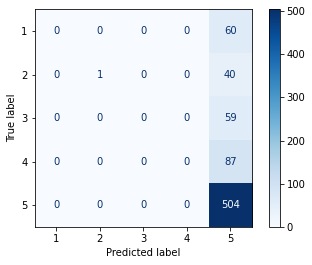

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
target_names = ['1', '2', '3', '4', '5']
disp = plot_confusion_matrix(SVM, X_test, y_test, display_labels=target_names,cmap=plt.cm.Blues) 
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, result, target_names=target_names))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        60
           2       1.00      0.02      0.05        41
           3       0.00      0.00      0.00        59
           4       0.00      0.00      0.00        87
           5       0.67      1.00      0.80       504

    accuracy                           0.67       751
   macro avg       0.33      0.20      0.17       751
weighted avg       0.51      0.67      0.54       751



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
